In [480]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style
import os
import kagglehub

path = kagglehub.dataset_download("pratyushpuri/mobile-game-in-app-purchases-dataset-2025")
# print("Path to dataset files:", path)
df = pd.read_csv(os.path.join(path, "mobile_game_inapp_purchases.csv"))
print(df.head())

                                 UserID   Age  Gender      Country   Device  \
0  c9889ab0-9cfc-4a75-acd9-5eab1df0015c  49.0    Male       Norway  Android   
1  7c9e413c-ecca-45f2-a780-2826a07952a2  15.0    Male  Switzerland      iOS   
2  fd61e419-1a92-4f43-a8c7-135842ad328a  23.0    Male        China  Android   
3  bdb7f6d1-ff9a-468c-afe7-43f32a94293e  31.0    Male       Mexico  Android   
4  aa7eec14-4846-47b9-b879-9c98038cda04  37.0  Female        India  Android   

       GameGenre  SessionCount  AverageSessionLength SpendingSegment  \
0  Battle Royale             9                 12.83          Minnow   
1     Action RPG            11                 19.39          Minnow   
2       Fighting             9                  8.87          Minnow   
3         Racing            12                 19.56          Minnow   
4  Battle Royale            10                 15.23          Minnow   

   InAppPurchaseAmount  FirstPurchaseDaysAfterInstall PaymentMethod  \
0                11.4

In [481]:
df = df.drop(['UserID','SpendingSegment','LastPurchaseDate',],axis = 1)
print(df.head())

    Age  Gender      Country   Device      GameGenre  SessionCount  \
0  49.0    Male       Norway  Android  Battle Royale             9   
1  15.0    Male  Switzerland      iOS     Action RPG            11   
2  23.0    Male        China  Android       Fighting             9   
3  31.0    Male       Mexico  Android         Racing            12   
4  37.0  Female        India  Android  Battle Royale            10   

   AverageSessionLength  InAppPurchaseAmount  FirstPurchaseDaysAfterInstall  \
0                 12.83                11.40                           28.0   
1                 19.39                 6.37                           18.0   
2                  8.87                15.81                           30.0   
3                 19.56                13.49                            9.0   
4                 15.23                10.86                           15.0   

  PaymentMethod  
0     Apple Pay  
1    Debit Card  
2     Apple Pay  
3    Debit Card  
4        Paypa

In [482]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            2964 non-null   float64
 1   Gender                         2964 non-null   object 
 2   Country                        2964 non-null   object 
 3   Device                         2964 non-null   object 
 4   GameGenre                      2964 non-null   object 
 5   SessionCount                   3024 non-null   int64  
 6   AverageSessionLength           3024 non-null   float64
 7   InAppPurchaseAmount            2888 non-null   float64
 8   FirstPurchaseDaysAfterInstall  2888 non-null   float64
 9   PaymentMethod                  2888 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 236.4+ KB


In [483]:
df.describe(include="all")

,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod
count,2964.000000,2964,2964,2964,2964,3024.000000,3024.000000,2888.000000,2888.000000,2888
unique,NaN,3,27,2,15,NaN,NaN,NaN,NaN,7
top,NaN,Male,India,Android,Simulation,NaN,NaN,NaN,NaN,Debit Card
freq,NaN,1810,242,1738,219,NaN,NaN,NaN,NaN,433
mean,33.533738,NaN,NaN,NaN,NaN,10.074735,20.073978,102.582864,15.384003,NaN
std,11.992258,NaN,NaN,NaN,NaN,3.115863,8.585208,454.339708,8.946191,NaN
min,13.000000,NaN,NaN,NaN,NaN,1.000000,5.010000,0.000000,0.000000,NaN
25%,23.000000,NaN,NaN,NaN,NaN,8.000000,12.680000,5.987500,8.000000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,10.000000,20.315000,11.975000,16.000000,NaN
75%,44.000000,NaN,NaN,NaN,NaN,12.000000,27.420000,17.762500,23.000000,NaN


In [484]:
for col in df.columns:
    if(df[col].dtype == 'object'):
      print(col.upper ,':' , df[col].nunique())
      print(df[col].value_counts().sort_values)
      print("\n")

<built-in method upper of str object at 0x7a6e1b62c0c0> : 3
<bound method Series.sort_values of Gender
Male      1810
Female    1098
Other       56
Name: count, dtype: int64>


<built-in method upper of str object at 0x7a6e19d4d800> : 27
<bound method Series.sort_values of Country
India           242
Switzerland     119
Saudi Arabia    116
Mexico          115
Netherlands     114
Germany         114
Australia       113
Japan           112
Italy           112
UK              108
Norway          107
USA             107
Sweden          106
Denmark         106
Iran            105
Brazil          105
Canada          105
South Korea     103
China           101
Egypt           101
Bangladesh      101
Spain            96
Russia           93
Afghanistan      93
France           92
Turkey           90
Sri Lanka        88
Name: count, dtype: int64>


<built-in method upper of str object at 0x7a6e19d4c540> : 2
<bound method Series.sort_values of Device
Android    1738
iOS        1226
Name: count, d

In [485]:
df=pd.get_dummies(df,columns=['Gender','Device','Country', 'GameGenre', 'PaymentMethod'],drop_first=True)
print(df.head())

    Age  SessionCount  AverageSessionLength  InAppPurchaseAmount  \
0  49.0             9                 12.83                11.40   
1  15.0            11                 19.39                 6.37   
2  23.0             9                  8.87                15.81   
3  31.0            12                 19.56                13.49   
4  37.0            10                 15.23                10.86   

   FirstPurchaseDaysAfterInstall  Gender_Male  Gender_Other  Device_iOS  \
0                           28.0         True         False       False   
1                           18.0         True         False        True   
2                           30.0         True         False       False   
3                            9.0         True         False       False   
4                           15.0        False         False       False   

   Country_Australia  Country_Bangladesh  ...  GameGenre_Sandbox  \
0              False               False  ...              False   
1   

In [486]:
df.isnull().sum()

,0
Age,60
SessionCount,0
AverageSessionLength,0
InAppPurchaseAmount,136
FirstPurchaseDaysAfterInstall,136
Gender_Male,0
Gender_Other,0
Device_iOS,0
Country_Australia,0
Country_Bangladesh,0


In [487]:
for col in df.columns:
  if df[col].dtype != 'object':
    mean = df[col].mean()
    df[col] = df[col].fillna(mean)
df.isnull().sum()
print(df.head())

    Age  SessionCount  AverageSessionLength  InAppPurchaseAmount  \
0  49.0             9                 12.83                11.40   
1  15.0            11                 19.39                 6.37   
2  23.0             9                  8.87                15.81   
3  31.0            12                 19.56                13.49   
4  37.0            10                 15.23                10.86   

   FirstPurchaseDaysAfterInstall  Gender_Male  Gender_Other  Device_iOS  \
0                           28.0         True         False       False   
1                           18.0         True         False        True   
2                           30.0         True         False       False   
3                            9.0         True         False       False   
4                           15.0        False         False       False   

   Country_Australia  Country_Bangladesh  ...  GameGenre_Sandbox  \
0              False               False  ...              False   
1   

In [488]:
df.describe()

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,33.533738,10.074735,20.073978,102.582864,15.384003
std,11.872651,3.115863,8.585208,444.002088,8.742638
min,13.000000,1.000000,5.010000,0.000000,0.000000
25%,24.000000,8.000000,12.680000,6.157500,8.000000
50%,33.533738,10.000000,20.315000,12.560000,15.384003
75%,44.000000,12.000000,27.420000,18.672500,23.000000
max,54.000000,22.000000,34.990000,4964.450000,30.000000


In [489]:
dups = df.duplicated()
print("the total no of duplicates = %d" % (dups.sum()))

the total no of duplicates = 0


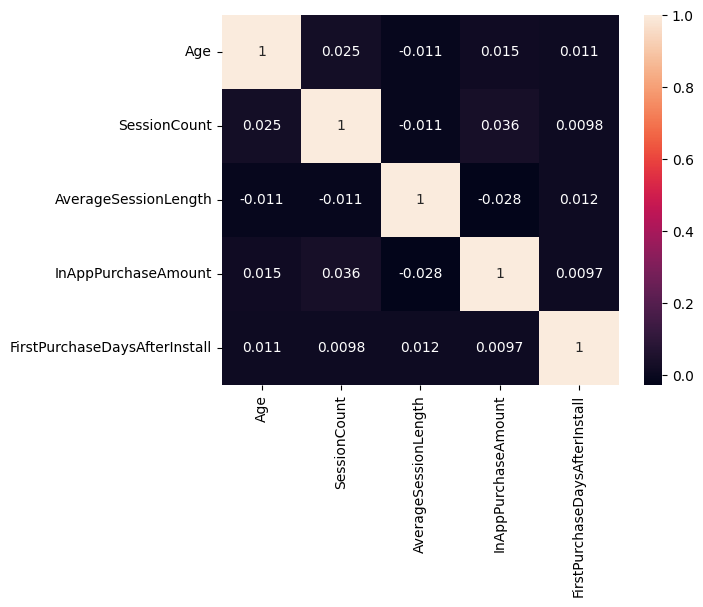

In [490]:
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

In [491]:
df.head()

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,Gender_Male,Gender_Other,Device_iOS,Country_Australia,Country_Bangladesh,...,GameGenre_Sandbox,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,PaymentMethod_Carrier Billing,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_Gift Card,PaymentMethod_Google Pay,PaymentMethod_Paypal
0,49.0,9,12.83,11.40,28.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,11,19.39,6.37,18.0,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,23.0,9,8.87,15.81,30.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,31.0,12,19.56,13.49,9.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,37.0,10,15.23,10.86,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            3024 non-null   float64
 1   SessionCount                   3024 non-null   int64  
 2   AverageSessionLength           3024 non-null   float64
 3   InAppPurchaseAmount            3024 non-null   float64
 4   FirstPurchaseDaysAfterInstall  3024 non-null   float64
 5   Gender_Male                    3024 non-null   bool   
 6   Gender_Other                   3024 non-null   bool   
 7   Device_iOS                     3024 non-null   bool   
 8   Country_Australia              3024 non-null   bool   
 9   Country_Bangladesh             3024 non-null   bool   
 10  Country_Brazil                 3024 non-null   bool   
 11  Country_Canada                 3024 non-null   bool   
 12  Country_China                  3024 non-null   b

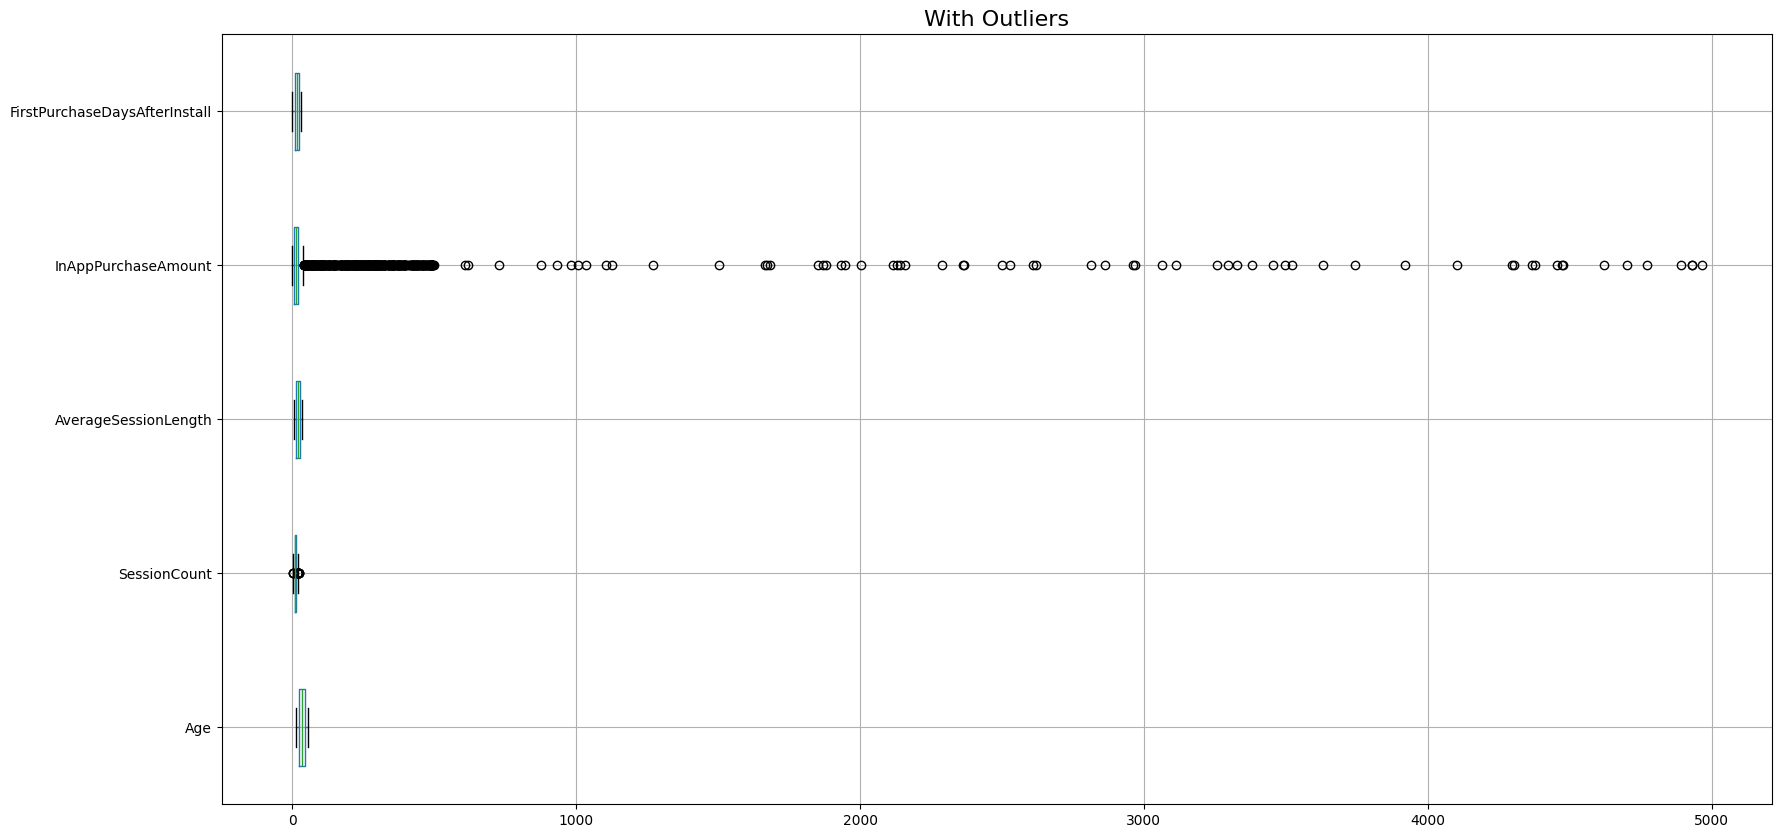

In [493]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(20,10))
df[numeric_cols].boxplot(vert=False)   # or vert=0 works too
plt.title('With Outliers', fontsize=16)
plt.show()

In [494]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [495]:
for column in df.columns:
    # check if column is numeric
    if pd.api.types.is_numeric_dtype(df[column])  and df[column].dtype != bool:
        lr, ur = remove_outlier(df[column])
        df[column] = np.where(df[column] > ur, ur, df[column])
        df[column] = np.where(df[column] < lr, lr, df[column])
    else:
        # skip non-numeric columns
        pass

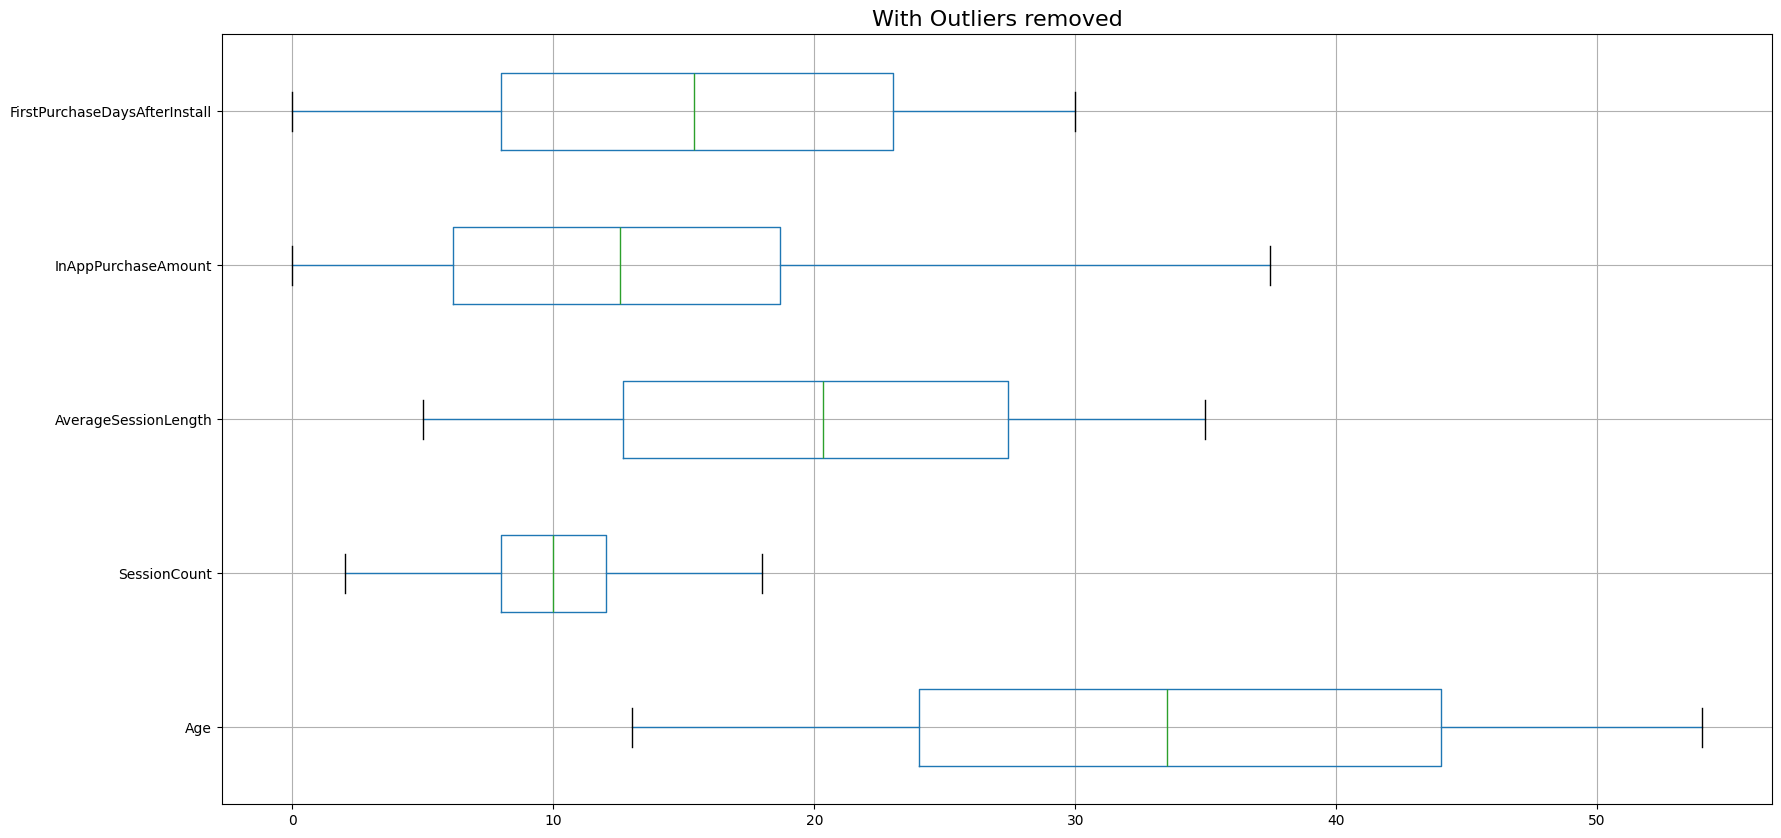

In [496]:
plt.figure(figsize=(20,10))
df[numeric_cols].boxplot(vert=False)   # or vert=0 works too
plt.title('With Outliers removed', fontsize=16)
plt.show()

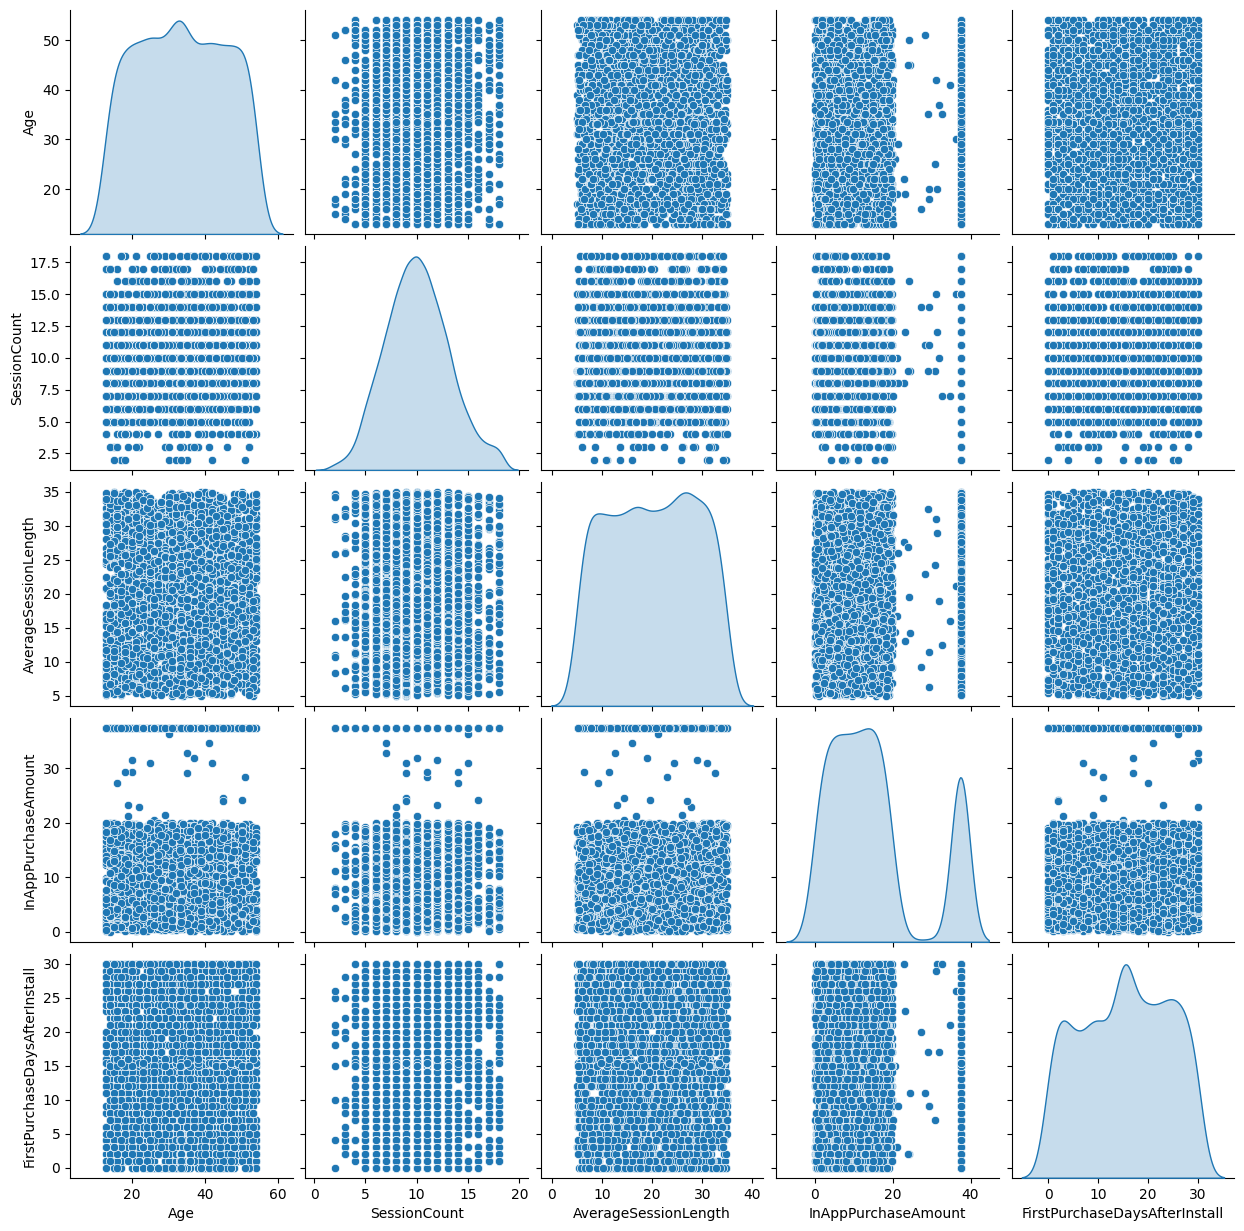

In [497]:
df_attr = (df[numeric_cols])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

In [498]:
df.head()

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,Gender_Male,Gender_Other,Device_iOS,Country_Australia,Country_Bangladesh,...,GameGenre_Sandbox,GameGenre_Simulation,GameGenre_Sports,GameGenre_Strategy,PaymentMethod_Carrier Billing,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_Gift Card,PaymentMethod_Google Pay,PaymentMethod_Paypal
0,49.0,9.0,12.83,11.40,28.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,15.0,11.0,19.39,6.37,18.0,True,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,23.0,9.0,8.87,15.81,30.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,31.0,12.0,19.56,13.49,9.0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,37.0,10.0,15.23,10.86,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [499]:
# corr = df.corr()['FirstPurchaseDaysAfterInstall'].sort_values(ascending=False)
# print(corr)

In [500]:
X = df.drop(columns=['InAppPurchaseAmount'])
# Copy target into the y dataframe.
y = df[['InAppPurchaseAmount']]

In [501]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Encode AFTER splitting
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Align columns so train & test have same features
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

In [502]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print("Train R²:", reg.score(X_train, y_train))
print("Test R²:", r2_score(y_test, y_pred))
# print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

Train R²: 0.047856084587484804
Test R²: 0.02463197415443008


In [503]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [504]:
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

np.float64(11.782262552612957)

In [505]:
import statsmodels.api as sm
print(X_train.dtypes)
print(y_train.dtypes)

Age                              float64
SessionCount                     float64
AverageSessionLength             float64
FirstPurchaseDaysAfterInstall    float64
Gender_Male                         bool
Gender_Other                        bool
Device_iOS                          bool
Country_Australia                   bool
Country_Bangladesh                  bool
Country_Brazil                      bool
Country_Canada                      bool
Country_China                       bool
Country_Denmark                     bool
Country_Egypt                       bool
Country_France                      bool
Country_Germany                     bool
Country_India                       bool
Country_Iran                        bool
Country_Italy                       bool
Country_Japan                       bool
Country_Mexico                      bool
Country_Netherlands                 bool
Country_Norway                      bool
Country_Russia                      bool
Country_Saudi Ar

In [506]:
# Convert boolean columns to integers
X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()

# Convert booleans in X_train/X_test
for col in X_train.columns:
    if X_train[col].dtype == 'bool':
        X_train[col] = X_train[col].astype(int)
        X_test[col] = X_test[col].astype(int)

# Convert booleans in y_train (if y_train has only one column)
for col in y_train.columns:
    if y_train[col].dtype == 'bool':
        y_train[col] = y_train[col].astype(int)

# Add constant term
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the OLS model
model = sm.OLS(y_train, X_train).fit()
# print(model.summary())



In [507]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     InAppPurchaseAmount   R-squared:                       0.048
Model:                             OLS   Adj. R-squared:                  0.025
Method:                  Least Squares   F-statistic:                     2.100
Date:                 Thu, 28 Aug 2025   Prob (F-statistic):           7.56e-06
Time:                         07:57:45   Log-Likelihood:                -8812.4
No. Observations:                 2268   AIC:                         1.773e+04
Df Residuals:                     2214   BIC:                         1.804e+04
Df Model:                           53                                         
Covariance Type:             nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            18.4181      2.038      9.037      0.000      14.421      22.415
Age                               0.0010      0.021      0.046      0.963      -0.041       0.043
SessionCount                      0.0484      0.083      0.586      0.558      -0.114       0.211
AverageSessionLength             -0.0074      0.030     -0.251      0.802      -0.065       0.051
FirstPurchaseDaysAfterInstall     0.0260      0.029      0.898      0.369      -0.031       0.083
Gender_Male                       0.0927      0.524      0.177      0.860      -0.934       1.119
Gender_Other                     -1.7209      1.947     -0.884      0.377      -5.539       2.097
Device_iOS                        0.3690      0.518      0.712      0.477      -0.647       1.385
Country_Australia                -0.9464      1.653     -0.572      0.567      -4.189       2.296
Country_Bangladesh                3.9772      1.783      2.231      0.026       0.481       7.474
Country_Brazil                   -0.8412      1.720     -0.489      0.625      -4.215       2.533
Country_Canada                    1.0573      1.749      0.605      0.546      -2.372       4.487
Country_China                    -1.3521      1.740     -0.777      0.437      -4.764       2.060
Country_Denmark                  -0.0924      1.698     -0.054      0.957      -3.423       3.238
Country_Egypt                    -1.1502      1.752     -0.656      0.512      -4.586       2.286
Country_France                   -1.1900      1.816     -0.655      0.512      -4.751       2.371
Country_Germany                   0.4903      1.733      0.283      0.777      -2.908       3.888
Country_India                     0.6488      1.403      0.462      0.644      -2.103       3.400
Country_Iran                     -0.1437      1.746     -0.082      0.934      -3.567       3.279
Country_Italy                    -1.2589      1.716     -0.734      0.463      -4.623       2.106
Country_Japan                     0.7753      1.705      0.455      0.649      -2.569       4.119
Country_Mexico                    1.7281      1.657      1.043      0.297      -1.521       4.977
Country_Netherlands              -1.1559      1.678     -0.689      0.491      -4.447       2.135
Country_Norway                    1.0963      1.719      0.638      0.524      -2.275       4.467
Country_Russia                    0.9760      1.771      0.551      0.582      -2.498       4.450
Country_Saudi Arabia              2.4599      1.713      1.436      0.151      -0.899       5.819
Country_South Korea              -0.2240      1.738     -0.129      0.897      -3.633       3.185
Country_Spain                    -1.5921      1.863     -0.855      0.393      -5.245       2.061
Country_Sri Lanka                 

In [508]:
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)
np.sqrt(mse)#RMSE on train

np.float64(11.782262552612957)

In [509]:
# Prediction on Test data
y_pred = model.predict(X_test)
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

np.float64(11.474552628451203)

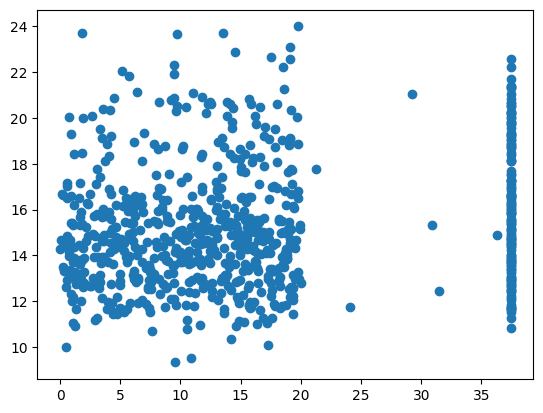

In [510]:
plt.scatter(y_test, y_pred)
plt.show()

In [511]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(18.42) * const + (0.0) * Age + (0.05) * SessionCount + (-0.01) * AverageSessionLength + (0.03) * FirstPurchaseDaysAfterInstall + (0.09) * Gender_Male + (-1.72) * Gender_Other + (0.37) * Device_iOS + (-0.95) * Country_Australia + (3.98) * Country_Bangladesh + (-0.84) * Country_Brazil + (1.06) * Country_Canada + (-1.35) * Country_China + (-0.09) * Country_Denmark + (-1.15) * Country_Egypt + (-1.19) * Country_France + (0.49) * Country_Germany + (0.65) * Country_India + (-0.14) * Country_Iran + (-1.26) * Country_Italy + (0.78) * Country_Japan + (1.73) * Country_Mexico + (-1.16) * Country_Netherlands + (1.1) * Country_Norway + (0.98) * Country_Russia + (2.46) * Country_Saudi Arabia + (-0.22) * Country_South Korea + (-1.59) * Country_Spain + (1.38) * Country_Sri Lanka + (1.27) * Country_Sweden + (-1.44) * Country_Switzerland + (0.88) * Country_Turkey + (-1.29) * Country_UK + (0.28) * Country_USA + (1.91) * GameGenre_Adventure + (-0.59) * GameGenre_Battle Royale + (-1.23) * GameGenre_Card + 